# ***`LIBRARIES`***

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ***`READ DATA`***

In [40]:
df = pd.read_excel('Merged Data (Repaired)_CategoryEncoded.xlsx')
df.head(2)

,Seller Link,Store Name_x,Product Categories,Year Joined,Total Products,Rating,Review Count,Followers,Chat Response Rate,Total Revenue,...,Thời trang nữ,Túi thời trang nam,Túi thời trang nữ,Voucher - Dịch vụ,Ô Tô - Xe Máy - Xe Đạp,Điện Gia Dụng,Điện Thoại - Máy Tính Bảng,Điện Tử - Điện Lạnh,Đồ Chơi - Mẹ & Bé,Đồng hồ và Trang sức
0,https://tiki.vn/cua-hang/cong-nghe-viet?source...,Công Nghệ Việt,"['Thiết Bị Số - Phụ Kiện Số', 'Nhà Cửa - Đời S...",2017,63,4.4,21000,1700,1.0,99846090,...,0,0,0,0,1,0,0,0,0,0
1,https://tiki.vn/cua-hang/lynu-store?source_scr...,LYNU STORE,"['Nhà Cửa - Đời Sống', 'Ô Tô - Xe Máy - Xe Đạp...",2023,348,4.3,87,56,1.0,8801050,...,1,1,1,0,1,0,0,1,0,0


# ***`DATA PREPROCESSING`***

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Rating                            1822 non-null   float64
 1   Review Count                      1822 non-null   int64  
 2   Followers                         1822 non-null   int64  
 3   Chat Response Rate                1822 non-null   float64
 4   Total Revenue                     1822 non-null   int64  
 5   Total Review                      1822 non-null   int64  
 6   1 Start                           1822 non-null   int64  
 7   2 Start                           1822 non-null   int64  
 8   3 Start                           1822 non-null   int64  
 9   4 Start                           1822 non-null   int64  
 10  5 Start                           1822 non-null   int64  
 11  Years Joined                      1822 non-null   int64  
 12  Balo v

In [42]:
df['Túi thời trang'] = df['Túi thời trang nam'] | df['Túi thời trang nữ']
df['Giày - Dép'] = df['Giày - Dép nam'] | df['Giày - Dép nữ']
df['Thời trang'] = df['Thời trang nam'] | df['Thời trang nữ']
df['Túi thời trang'] = df['Túi thời trang nam'] | df['Túi thời trang nữ']
df['Mẹ & Bé'] = df['Đồ Chơi - Mẹ & Bé'] | df['Thời Trang Cho Mẹ Và Bé']

In [43]:
df = df.drop(columns=['Seller Link', 'Store Name_x', 'Product Categories', 'Year Joined', 'Total Products', '1', 'Túi thời trang nam', 'Túi thời trang nữ', 'Giày - Dép nam', 'Giày - Dép nữ', 'Thời trang nữ', 'Thời trang nam', 'Túi thời trang nam', 'Túi thời trang nữ', 'Thời Trang Cho Mẹ Và Bé', 'Đồ Chơi - Mẹ & Bé'])

In [44]:
df_cor = df.iloc[:,:12]

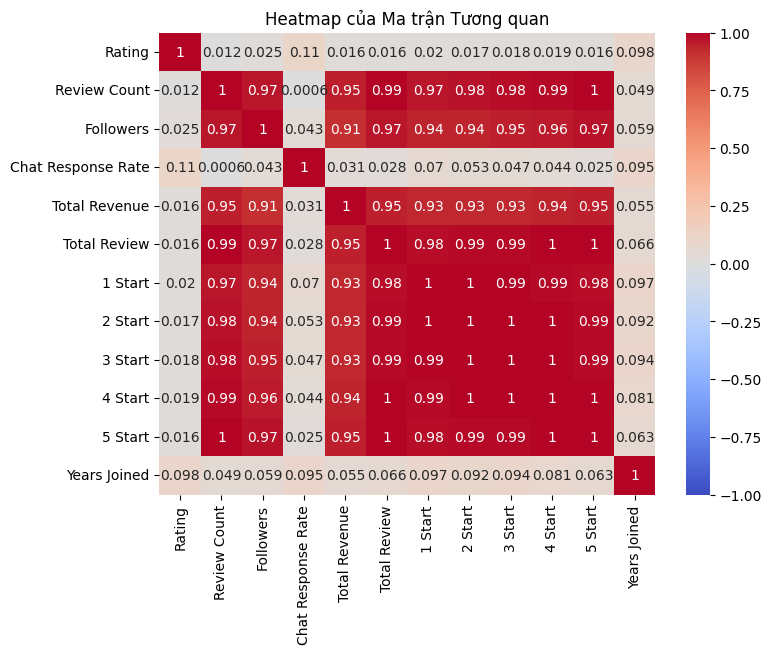

In [45]:
# Tính toán ma trận tương quan
correlation_matrix = df_cor.corr()

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Heatmap của Ma trận Tương quan")
plt.show()

In [50]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Giả sử bạn có DataFrame df với các cột Shop_Rating và Counter_Rating
# Xác định z cho mức độ tin cậy mong muốn (95% confidence level)
z = norm.ppf(0.975)  # z = 1.96 cho mức độ tin cậy 95%

# Hàm tính điểm Wilson
def wilson_score(average_rating, total_ratings, z=z):
    p_hat = average_rating / 5  # Chuyển đổi Shop_Rating thành tỷ lệ giữa 0 và 1
    denominator = 1 + z**2 / total_ratings
    center_adjusted_probability = p_hat + z**2 / (2 * total_ratings)
    adjusted_standard_deviation = z * np.sqrt((p_hat * (1 - p_hat) + z**2 / (4 * total_ratings)) / total_ratings)
    wilson_lower_bound = (center_adjusted_probability - adjusted_standard_deviation) / denominator
    return wilson_lower_bound * 5  # Quy đổi về thang 5 sao

# Áp dụng hàm vào cột mới 'Wilson_Score' trong DataFrame
# Thay đổi ở đây: Truyền các giá trị của từng hàng vào hàm wilson_score
df['Rating Quality'] = df.apply(lambda x: wilson_score(x['Rating'], x['Review Count']), axis=1)
df['Rating Quality'] = df['Rating Quality'].fillna(0)

<ipython-input-50-9d71c91e1b5e>:12: RuntimeWarning: divide by zero encountered in scalar divide
  denominator = 1 + z**2 / total_ratings
<ipython-input-50-9d71c91e1b5e>:13: RuntimeWarning: divide by zero encountered in scalar divide
  center_adjusted_probability = p_hat + z**2 / (2 * total_ratings)
<ipython-input-50-9d71c91e1b5e>:14: RuntimeWarning: divide by zero encountered in scalar divide
  adjusted_standard_deviation = z * np.sqrt((p_hat * (1 - p_hat) + z**2 / (4 * total_ratings)) / total_ratings)
<ipython-input-50-9d71c91e1b5e>:15: RuntimeWarning: invalid value encountered in scalar subtract
  wilson_lower_bound = (center_adjusted_probability - adjusted_standard_deviation) / denominator


In [51]:
df['Rating Quality']

,Rating Quality
0,4.377676
1,3.859082
2,4.341414
3,3.728618
4,3.992363
...,...
1817,4.018280
1818,1.032747
1819,0.000000
1820,3.215288
